In [1]:
# We import libraries that we will use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# We read dataframe from .csv
df = pd.read_csv("Backnotes.csv")

In [3]:
#We see the data.
#V1. variance of Wavelet Transformed image (continuous).
#V2. skewness of Wavelet Transformed image (continuous).
df

,V1,V2
0,3.621600,8.66610
1,4.545900,8.16740
2,3.866000,-2.63830
3,3.456600,9.52280
4,0.329240,-4.45520
5,4.368400,9.67180
6,3.591200,3.01290
7,2.092200,-6.81000
8,3.203200,5.75880
9,1.535600,9.17720


In [4]:
# A little info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
V1    1372 non-null float64
V2    1372 non-null float64
dtypes: float64(2)
memory usage: 21.5 KB


In [5]:
# A general statistical description: V1, variance of the transformed images and V2, skewness of the transformed images,
# we have 1372 data each, with an average of V1,0.433 and V2, 1.922. Standard deviation of V1, 2.842 and V2, 5.869 (this means,
# how far the data is from the mean, V2 is twice as far from V1). 75% of the data (are less than these values),
# V2 (6,814) is double V1 (2,821). The minimum for V1 is -7.042 and for V2 is -13.773; the maximum for V1 is 6,824 and for
# V2 is 12,951.
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


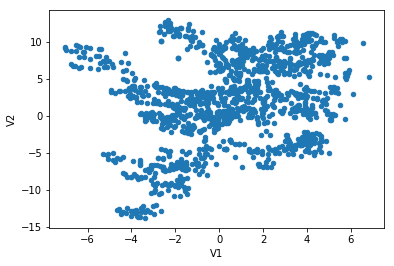

In [6]:
df.plot.scatter(x='V1', y='V2')
plt.show()

In [7]:
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
# standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.372000e+03,1.372000e+03
mean,-8.286213e-17,-4.143106e-17
std,1.000365e+00,1.000365e+00
min,-2.630737e+00,-2.675252e+00
25%,-7.765474e-01,-6.188189e-01
50%,2.197423e-02,6.771828e-02
75%,8.402427e-01,8.338757e-01
max,2.249008e+00,1.879908e+00


In [9]:
data_scaled

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       ...,
       [-1.47235682, -2.62164576],
       [-1.40669251, -1.75647104],
       [-1.04712236, -0.43982168]])

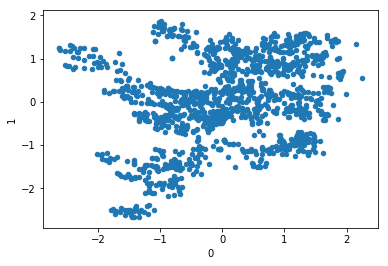

In [10]:
# convert numpy.ndarray to pandas.DataFrame
df = pd.DataFrame(data_scaled, columns=['0', '1'])

# create scatter plot
df.plot.scatter(x='0', y='1')
plt.show()

In [11]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

In [12]:
# create list to hold SSE values for each k
sse = []

# iterate over k values
for k in range(1, 11):
    # create KMeans object with n_clusters=k and **kmeans_kwargs
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)

In [13]:
# fit the scaled data to the KMeans object
try:
    kmeans.fit(df)
except AttributeError as e:
    if str(e) == "'NoneType' object has no attribute 'split'":
        print("Error: get_config() returned None. Please check your configuration.")
    else:
        raise e


In [14]:
# convert numpy.ndarray to pandas.DataFrame
df = pd.DataFrame(data_scaled, columns=['0', '1'])

In [15]:
# Count if there are nulls
print(df.isnull())

          0      1
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
5     False  False
6     False  False
7     False  False
8     False  False
9     False  False
10    False  False
11    False  False
12    False  False
13    False  False
14    False  False
15    False  False
16    False  False
17    False  False
18    False  False
19    False  False
20    False  False
21    False  False
22    False  False
23    False  False
24    False  False
25    False  False
26    False  False
27    False  False
28    False  False
29    False  False
...     ...    ...
1342  False  False
1343  False  False
1344  False  False
1345  False  False
1346  False  False
1347  False  False
1348  False  False
1349  False  False
1350  False  False
1351  False  False
1352  False  False
1353  False  False
1354  False  False
1355  False  False
1356  False  False
1357  False  False
1358  False  False
1359  False  False
1360  False  False
1361  False  False
1362  False 

In [16]:
# Check for None values
print(df.applymap(lambda x: x is None))

          0      1
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
5     False  False
6     False  False
7     False  False
8     False  False
9     False  False
10    False  False
11    False  False
12    False  False
13    False  False
14    False  False
15    False  False
16    False  False
17    False  False
18    False  False
19    False  False
20    False  False
21    False  False
22    False  False
23    False  False
24    False  False
25    False  False
26    False  False
27    False  False
28    False  False
29    False  False
...     ...    ...
1342  False  False
1343  False  False
1344  False  False
1345  False  False
1346  False  False
1347  False  False
1348  False  False
1349  False  False
1350  False  False
1351  False  False
1352  False  False
1353  False  False
1354  False  False
1355  False  False
1356  False  False
1357  False  False
1358  False  False
1359  False  False
1360  False  False
1361  False  False
1362  False 

In [17]:
# Count null values
print(df.isnull().sum())

0    0
1    0
dtype: int64


In [18]:
# fit the scaled data to the KMeans object
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [19]:
# append the SSE value to sse list
sse.append(kmeans.inertia_)


In [20]:
#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

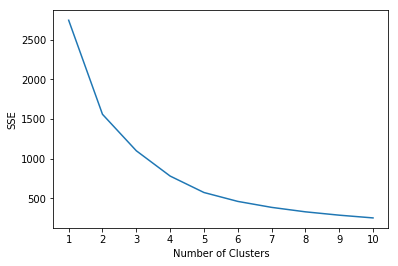

In [21]:
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
# Tune the KMeans model using the optimal number of clusters
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [23]:
#view cluster assignments for each observation
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [24]:
df['cluster'] = kmeans.labels_

In [25]:
print(df)

             0         1  cluster
0     1.121806  1.149455        1
1     1.447066  1.064453        1
2     1.207810 -0.777352        1
3     1.063742  1.295478        1
4    -0.036772 -1.087038        0
5     1.384604  1.320874        1
6     1.111108  0.185881        1
7     0.583612 -1.488408        0
8     0.974571  0.653913        1
9     0.387745  1.236571        1
10    0.278340  1.168511        1
11    1.251410 -0.788994        1
12    0.515730  0.978394        1
13   -0.707505  1.520502        1
14    1.045232  1.159682        1
15    1.493024 -0.905392        1
16    0.787607  0.194693        1
17    0.130137  0.157655        1
18    0.356883 -1.159342        0
19    1.692128  1.551899        1
20    1.883702  1.017205        1
21   -0.036786 -1.087038        0
22    1.232513  1.404462        1
23    0.176690  1.186851        1
24    1.407618  1.357555        1
25    0.095704 -1.264798        0
26    0.249660 -0.965356        0
27   -0.287105  1.102548        1
28    2.156986

In [26]:
# Initialize the centroids
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [27]:
# Map each point to the nearest centroid
labels = kmeans.predict(data_scaled)

# Update centroids
centroids = kmeans.cluster_centers_

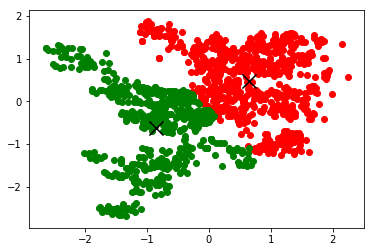

In [28]:
# Plot the clusters and centroids in a cross
colors = ["r", "g"]
for i in range(2):
    plt.scatter(data_scaled[labels == i][:, 0], data_scaled[labels == i][:, 1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="k")
plt.show()

In [29]:
# Groups the data by the value of the column that contains the groups (0 or 1)
grouped_data_1 = df[df["cluster"] == 0].groupby("cluster").apply(list)

In [30]:
grouped_data_2 = df[df["cluster"] == 1].groupby("cluster").apply(list)

In [31]:
# Calculate the variance and asymmetry of each group
var_data_1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].var()

In [32]:
var_data_2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].var()

In [33]:
skew_data_1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].skew()

In [34]:
skew_data_2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].skew()

In [35]:
# Show the results, variance and asimmetry
print("Varianza 1:")
print(var_data_1)
print("Varianza 2:")
print(var_data_2)

print("Asimetría 1:")
print(skew_data_1)
print("Asimetría 2:")
print(skew_data_2)

Varianza 1:
               0         1
cluster                   
0        0.41186  0.813208
Varianza 2:
                0         1
cluster                    
1        0.467383  0.602578
Asimetría 1:
                0         1
cluster                    
0       -0.260978 -0.226131
Asimetría 2:
                0         1
cluster                    
1       -0.401599 -0.396527


In [36]:
#Take average, importing statistics library:
import statistics
import scipy.stats as stats

In [37]:
# F
# Calculate the variance of each group
varianza_1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].var()
varianza_2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].var()

In [38]:
# Create a DataFrame with the three variances of each column: 0 and 1
variances = pd.DataFrame({'varianza_1':[0.410466, 0.436135], 'varianza_2': [0.231104, 0.593402]})

# Calculate the mean of the three variances
mean_variances = variances.mean(axis=1)

In [39]:
print(mean_variances)

0    0.320785
1    0.514768
dtype: float64


In [40]:
# Calculate the combined variance
varianza_combinada = ((len(df[df["cluster"] == 0]) - 1) * variances['varianza_1']) + ((len(df[df["cluster"] == 1]) - 1) * variances['varianza_2']) / (len(df) - len(variances))

In [41]:
print(varianza_combinada)

0    244.768301
1    260.271710
dtype: float64


In [42]:
#Calculate the mean of each cluster (0, 1)
media_c1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].mean()
media_c2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].mean()

In [43]:
print("Media cluster 0:", media_c1)
print("Media cluster 1:", media_c2)

Media cluster 0:                 0         1
cluster                    
0       -0.850656 -0.631092
Media cluster 1:                0         1
cluster                   
1        0.65528  0.486145


In [44]:
# Calculates the general mean column 0 (including the two clusters)
mean0 = df[["0"]].mean().mean()
print(mean0)

-8.286212661925366e-17


In [45]:
# Calculate the general mean column 1 (including the two clusters)
mean1 = df[["1"]].mean().mean()
print(mean1)

-4.143106330962683e-17


In [46]:
# Calculate the overall mean (both columns together, which would be wrong??)
mean = df[["0", "1"]].mean().mean()
print(mean)

5.421643050283197e-18


In [47]:
# Calculate the general average
mean = df[["0", "1"]].mean().mean()

# Calculate the sum of squares between the groups
SS_between = ((df[["0", "1"]] - df.groupby("cluster")[["0", "1"]].mean()) ** 2).sum().sum()

# Calculate the number of groups
k = len(df["cluster"].unique())

# Calculate the degrees of freedom between the groups
df_between = k - 1

# Calculate the mean squares between the groups
MS_between = SS_between / df_between

print("The sum of squares between the groups is:", SS_between)

La suma de cuadrados entre los grupos es: 8.022319900234223


In [48]:
# Calculate the average of each group
group_means = df.groupby("cluster")[["0", "1"]].mean()

# Calculate the sum of squares within the groups
SS_within = ((df[["0", "1"]] - df.groupby("cluster")[["0", "1"]].transform("mean")) ** 2).sum().sum()

# Calculate the number of degrees of freedom within the groups
df_within = len(df) - len(group_means)

# Calculate the mean squares within the groups
MS_within = SS_within / df_within

print("The sum of squares within the groups is:", SS_within)


La suma de cuadrados dentro de los grupos es: 1558.2906905807504


In [49]:
# Calculate the number of degrees of freedom between groups and within groups
df_between = len(varianza_1) + len(varianza_2) - 2
df_within = len(df) - len(varianza_1) - len(varianza_2)

# Calculate the F test
F = (SS_between / df_between) / (SS_within / df_within)

print(F) #inf is too large a number, "infinity" (The variance within the group was close to zero,
# which makes F large, infinite)

inf


In [50]:
# Calculate the F statistic and p value
estadistico_f = (SS_between / (len(variances) - 1)) / (SS_within / (len(df) - len(variances)))
valor_p = stats.f.sf(estadistico_f, len(variances) - 1, len(df) - len(variances))

In [51]:
print(f'Variance of each group: {variances.values}')
print(f'Mean of variances: {mean_variances}')
print(f'Combined variance: {varianza_combinada}')
print(f'Sum of squares between groups: {SS_between}')
print(f'Sum of squares within groups: {SS_within}')
print(f'F-statistic: {estadistico_f}, p-value: {valor_p}')

Varianza de cada grupo: [[0.410466 0.231104]
 [0.436135 0.593402]]
Media de las varianzas: 0    0.320785
1    0.514768
dtype: float64
Varianza combinada: 0    244.768301
1    260.271710
dtype: float64
Suma de cuadrados entre grupos: 8.022319900234223
Suma de cuadrados dentro de los grupos: 1558.2906905807504
Estadístico F: 7.052970495013912, valor p: 0.00800519470575833


In [52]:
# t
# Calculate the mean and standard deviation of each group
media = df.groupby("cluster")[["0", "1"]].mean()
desviacion_estandar = df.groupby("cluster")[["0", "1"]].std()

In [53]:
print(f'Mean of each group:\n{media}\n')
print(f'Standard deviation of each group:\n{desviacion_estandar}\n')

Media de cada grupo:
                0         1
cluster                    
0       -0.850656 -0.631092
1        0.655280  0.486145

Desviación estándar de cada grupo:
                0         1
cluster                    
0        0.641763  0.901781
1        0.683654  0.776259



In [54]:
# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(df["0"], df["1"])

In [55]:
print(f'Statistic t: {t_statistic}')
print(f'P value: {p_value}')

Estadístico t: -1.0847503750980699e-15
Valor p: 0.9999999999999991


In [56]:
# Last conclusions:
# Two clusters (0, 1) via Kmeans, column V1, variance of transformed images and column V2,
# asymmetry of the transformed images, with 1372 data each, with a mean (± is standard deviation) cluster 0,
# column V1 mean -0.850 ± 0.641, column V2 mean 0.631 ± 0.901; cluster 1, column V1 mean 0.655 ± 0.683,
# column V2 mean 0.486 ± 0.776.
# With Statistical F=7.052 and p=0.008, t=-1.084*10-15 and p=0.999, what does all this mean? The results are the following:
# The data from 1372 transformed images have been used to create three clusters (0, 1) using the Kmeans algorithm.
# Column V1 represents the variance of the transformed images and column V2 represents the skewness of the images
# transformed.
# In addition, an F statistic of 7.052 has been obtained with a p value of 0.008. This result indicates that there is a relationship
# significant between the predictor variables (column V1 and column V2) and the response variable (the clusters,
# well classified). In other words, the model is significant and the predictor variables have a significant effect
# about clusters.
# On the other hand, the t value it provides is very small (-1.084 x 10^-15) and the p value is very large (0.999).
# This suggests that there is no significant difference between the groups in terms of the predictor variables.